# Classifying Heart Disease

### The purpose of this notebook is to investigate Logistic Regression in Python.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [83]:
# Load in the heart disease dataset
heart = pd.read_csv("heart.csv")

## 1. Exploring the Dataset

In [84]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


array([[<AxesSubplot:title={'center':'HeartDisease'}>]], dtype=object)

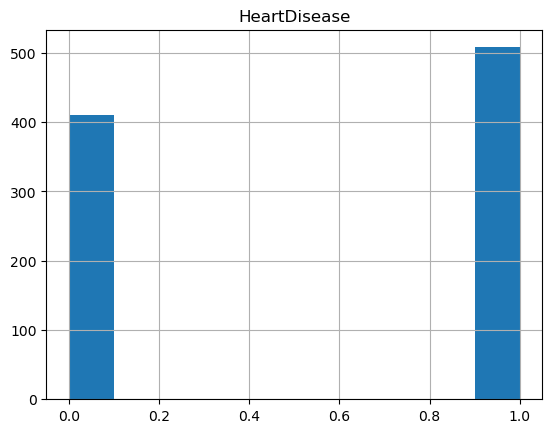

In [85]:
# Checking the outcome
heart.hist("HeartDisease")

In [86]:
heart = pd.get_dummies(heart, columns=['Sex'], drop_first=True)

In [87]:
heart['Sex'] = heart['Sex_M']
heart = heart.drop('Sex_M', axis=1)
heart

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0


In [88]:
heart.groupby("HeartDisease").agg(
    {
        "Age": "mean",
        "Sex": "mean",
        "Cholesterol": "mean",
        "FastingBS": "mean",
        "MaxHR": "mean",
        "Oldpeak": "mean"    }
)

,Age,Sex,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,0.651220,227.121951,0.107317,148.151220,0.408049
1,55.899606,0.901575,175.940945,0.334646,127.655512,1.274213


### Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:
#### o Age
#### o Cholesterol
#### o MaxHR
#### o FastingBS
#### o Oldpeak

## 2. Dividing The Data
### We'll use a 70-30 split of the dataset for the training and test sets.

In [89]:
X = heart[["Age", "Cholesterol", "MaxHR", "FastingBS", 'Oldpeak']]
y = heart["HeartDisease"]

# 70% for training set, 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [81]:
# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

Y_train:  298
Y_train:  344
Y_test:  112
Y_test:  164


### We confirm above that there are both cases and non-cases in both the training and test sets



## 3. Build the Model

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [91]:
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)
     

Training Accuracy:  0.7694704049844237
Training Sensitivity:  0.7761627906976745
Training Specificity:  0.761744966442953


### Overall the training accuracy was about 76%, the sensitivity was 77%, and the specificity was 76%. Based on these metrics, the model seems to perform better for non-cases.

## 4. Interpreting The Model Coefficients

In [92]:
coefs = ["Age", "Cholesterol", "MaxHR", "FastingBS", 'Oldpeak']

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

Age : 0.01
Cholesterol : -0.0
MaxHR : -0.03
FastingBS : 1.06
Oldpeak : 0.97


In [93]:

# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

Age : 1.01
Cholesterol : 1.0
MaxHR : 0.97
FastingBS : 2.88
Oldpeak : 2.63


### o Age, Cholesterol and MaxHR are associated with lower odds of heart disease holding the other predictors constant, and all those odds ratios are close to 1.
### o FastingBS and Oldpeak are associated with higher odds of heart disease holding the other predictors constant. These increases seem to be elevated.

## 5. Final Model Evaluation

In [95]:
# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.7898550724637681
Test Sensitivity:  0.8109756097560976
Test Specificity:  0.7589285714285714


## 6. Drawing Conclusions
### Test accuracy was 78%, sensitivity was 81%, and specificity was 75%. Compared to the training set, the accuracy didn't change much, while the model fared better with cases and worse with non-cases. This is potentially useful since this application is health-based.